In [1]:
import pandas as pd
import xgboost as xgb
import numpy as np

In [2]:
# 读取训练集
with open('seeds_dataset.txt.train', encoding = 'utf-8') as f:
    train = np.loadtxt(f, delimiter = '\t')

In [3]:
# 读取测试集
with open('seeds_dataset.txt.test', encoding = 'utf-8') as f:
    test  = np.loadtxt(f, delimiter = '\t')

In [4]:
train_data, train_label = train[:, :7], train[:, 7]

In [5]:
test_data,  test_label  = test[:,  :7], test[:,  7]

In [6]:
xgb_train = xgb.DMatrix(train_data, label = train_label)
xgb_test  = xgb.DMatrix(test_data,  label = test_label)

/usr/local/lib64/python3.6/site-packages/xgboost/data.py:97: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


# multi:softmax

In [7]:
# 通过multi:softmax进行多分类

params = {
    "objective": "multi:softmax",
    "eta": 0.1,
    "max_depth": 2,
    "num_class": 3
}

watchlist = [(xgb_train, "train"), (xgb_test, "test")]
num_round = 50

In [8]:
bst_1 = xgb.train(params, xgb_train, num_round, watchlist)

[0]	train-merror:0.04000	test-merror:0.11429
[1]	train-merror:0.03429	test-merror:0.11429
[2]	train-merror:0.02857	test-merror:0.11429
[3]	train-merror:0.02857	test-merror:0.11429
[4]	train-merror:0.02857	test-merror:0.11429
[5]	train-merror:0.02286	test-merror:0.11429
[6]	train-merror:0.02286	test-merror:0.11429
[7]	train-merror:0.02857	test-merror:0.11429
[8]	train-merror:0.02857	test-merror:0.11429
[9]	train-merror:0.02857	test-merror:0.11429
[10]	train-merror:0.03429	test-merror:0.11429
[11]	train-merror:0.03429	test-merror:0.11429
[12]	train-merror:0.03429	test-merror:0.11429
[13]	train-merror:0.03429	test-merror:0.11429
[14]	train-merror:0.04000	test-merror:0.05714
[15]	train-merror:0.03429	test-merror:0.05714
[16]	train-merror:0.03429	test-merror:0.05714
[17]	train-merror:0.03429	test-merror:0.05714
[18]	train-merror:0.03429	test-merror:0.05714
[19]	train-merror:0.03429	test-merror:0.05714
[20]	train-merror:0.03429	test-merror:0.05714
[21]	train-merror:0.03429	test-merror:0.0571

In [9]:
# 模型预测
pred = bst_1.predict(xgb_test)
pred

array([0., 0., 2., 0., 0., 0., 0., 0., 0., 2., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2.], dtype=float32)

In [10]:
# 测试集错误率
error_rate = np.sum(pred != test_label) / test.shape[0]
error_rate

0.05714285714285714

# multi:softprob

In [11]:
# 通过multi:softprob进行多分类

params = {
    "objective": "multi:softprob",
    "eta": 0.1,
    "max_depth": 2,
    "num_class": 3
}

watchlist = [(xgb_train, "train"), (xgb_test, "test")]
num_round = 50

In [12]:
bst_2 = xgb.train(params, xgb_train, num_round, watchlist)

[0]	train-merror:0.04000	test-merror:0.11429
[1]	train-merror:0.03429	test-merror:0.11429
[2]	train-merror:0.02857	test-merror:0.11429
[3]	train-merror:0.02857	test-merror:0.11429
[4]	train-merror:0.02857	test-merror:0.11429
[5]	train-merror:0.02286	test-merror:0.11429
[6]	train-merror:0.02286	test-merror:0.11429
[7]	train-merror:0.02857	test-merror:0.11429
[8]	train-merror:0.02857	test-merror:0.11429
[9]	train-merror:0.02857	test-merror:0.11429
[10]	train-merror:0.03429	test-merror:0.11429
[11]	train-merror:0.03429	test-merror:0.11429
[12]	train-merror:0.03429	test-merror:0.11429
[13]	train-merror:0.03429	test-merror:0.11429
[14]	train-merror:0.04000	test-merror:0.05714
[15]	train-merror:0.03429	test-merror:0.05714
[16]	train-merror:0.03429	test-merror:0.05714
[17]	train-merror:0.03429	test-merror:0.05714
[18]	train-merror:0.03429	test-merror:0.05714
[19]	train-merror:0.03429	test-merror:0.05714
[20]	train-merror:0.03429	test-merror:0.05714
[21]	train-merror:0.03429	test-merror:0.0571

In [13]:
# 模型预测
pred_prob = bst_2.predict(xgb_test)
pred_prob

array([[0.98332614, 0.00829965, 0.00837418],
       [0.98126423, 0.009326  , 0.00940975],
       [0.08527964, 0.00643307, 0.9082873 ],
       [0.8859765 , 0.08935267, 0.02467079],
       [0.9849219 , 0.00750539, 0.0075728 ],
       [0.8406657 , 0.04346374, 0.11587052],
       [0.98126423, 0.009326  , 0.00940975],
       [0.97942823, 0.01304122, 0.00753056],
       [0.9712129 , 0.01432917, 0.01445784],
       [0.37350857, 0.01729015, 0.60920125],
       [0.91517293, 0.00869787, 0.07612918],
       [0.05535635, 0.9367563 , 0.00788732],
       [0.02188178, 0.9699514 , 0.00816681],
       [0.10444342, 0.86837035, 0.0271862 ],
       [0.10444342, 0.86837035, 0.0271862 ],
       [0.02318318, 0.96816427, 0.00865253],
       [0.11847033, 0.85476923, 0.02676039],
       [0.01069443, 0.9850959 , 0.00420958],
       [0.02662113, 0.96475685, 0.00862208],
       [0.02318318, 0.96816427, 0.00865253],
       [0.01062979, 0.97914165, 0.01022859],
       [0.02318318, 0.96816427, 0.00865253],
       [0.

In [14]:
# 取向量中预测值最大的分类作为预测类别
pred_label = np.argmax(pred_prob, axis = 1)
pred_label

array([0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
# 计算测试集错误率
error_rate = np.sum(pred_label != test_label) / test.shape[0]
error_rate

0.05714285714285714

In [16]:
# multi:softmax预测值 与 multi:softprob向量中最大的分类作为预测值 结果完全一致
pred == pred_label

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

# 可视化模型

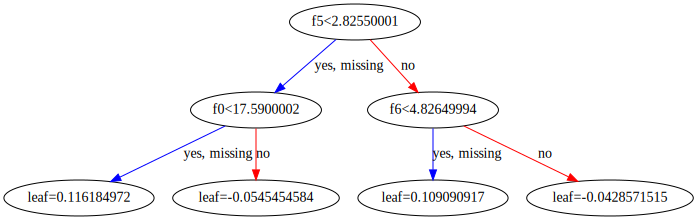

In [17]:
xgb.to_graphviz(bst_1, fmap = '', num_trees = 0)

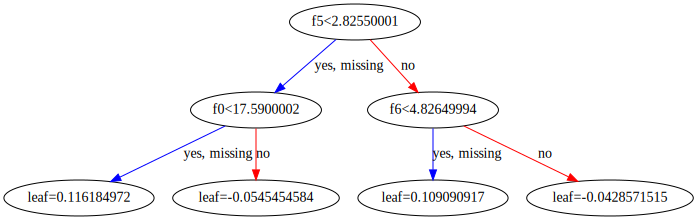

In [18]:
xgb.to_graphviz(bst_2, fmap = '', num_trees = 0)